Pyber Analyis
- One of the the obvious things we can tell from the data is that the majority of rides, drivers and fares exist in the Urban city type. This also correlates with smaller but more frequent fares. This is likely due to the distance traveled in the ride as well as the fact that there are likely to be more drivers per capita driving the price down. 
- As we go from Urban to Rural we conversely observe that the price of the average fare goes up as the number of drivers is also decreased. This is a similar but opposite observation as the one made above. It could be that ride distances are longer and there are fewer drivers so those two variables combined create the higher fares.
- One thing that could help flesh this data set out much more would be a ride distance column so we could calculate average ride distance by city type. 
- Another observation that can be made by looking at the last two pie charts is that rural drivers make up about 2.5% of total drivers while they make up 5.3% od total rides. It could be that rural drivers have the most opportunity to take advantage of a fare when one arises however the opportunity is less frequent. 

In [101]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Combine the data into a single dataset

# Display the data table for preview

In [102]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [103]:
#city_data_df.head()

In [104]:
#ride_data_df.head()

In [105]:
# Combine the data into a single dataset
pyber_df = pd.merge(city_data_df, ride_data_df, on="city")
pyber_df = pyber_df.rename(columns={"city":"City","driver_count":"Driver Count","type":"City Type","date":"Date", 
                                   "fare":"Fare","ride_id":"Ride ID"})
pyber_df.head()

,City,Driver Count,City Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [106]:
#calculating total rides by city 
total_rides = pyber_df['City'].value_counts()
#total_rides

In [107]:
pyber_grouped = pyber_df.groupby(['City'])
#pyber_grouped.count().head()

In [108]:
avg_fare = pyber_grouped["Fare"].mean()
#avg_fare

In [109]:
driver_count = pyber_grouped['Driver Count'].mean()
#driver_count

In [110]:
city_type = pyber_grouped['City Type'].unique()
#city_type

In [111]:
cities_df = pd.DataFrame({"City Type": city_type, 
                          "Average Fare": avg_fare,
                          "Driver Count": driver_count, 
                         "Total Rides": total_rides})
cities_df.iloc[:, 0] = cities_df.iloc[:, 0].str[0].astype(str)
cities_df.head()

,City Type,Average Fare,Driver Count,Total Rides
Amandaburgh,Urban,24.641667,12,18
Barajasview,Urban,25.332273,26,22
Barronchester,Suburban,36.422500,11,16
Bethanyland,Suburban,32.956111,22,18
Bradshawfurt,Rural,40.064000,7,10


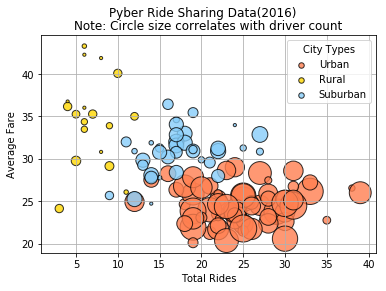

In [112]:
urban = cities_df.loc[cities_df['City Type']== 'Urban'] 
suburban = cities_df.loc[cities_df['City Type']== 'Suburban'] 
rural = cities_df.loc[cities_df['City Type']== 'Rural'] 

colors = ['Gold', 'lightskyblue', 'coral'] 

plt.scatter(urban['Total Rides'], urban['Average Fare'],
            edgecolors='black',
            s=urban['Driver Count'] * 10,
            marker='o', alpha=0.8, c=colors[2])
plt.scatter(rural['Total Rides'], rural['Average Fare'],
            edgecolors='black',
            s=rural['Driver Count'] * 10,
            marker='o', alpha=0.8, c=colors[0])
plt.scatter(suburban['Total Rides'], suburban['Average Fare'],
            edgecolors='black',
            s=suburban['Driver Count'] * 10,
            marker='o', alpha=0.8, c=colors[1])



plt.suptitle('Pyber Ride Sharing Data(2016)')
plt.title('Note: Circle size correlates with driver count')
plt.grid()
plt.xlabel('Total Rides')
plt.ylabel('Average Fare') 
lgnd = plt.legend(['Urban', 'Rural','Suburban'], title='City Types')
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])

plt.savefig('Pyber Ride Sharing Data(2016)scatter plot') 

In [113]:
#calculating total fares from original merged DataFrame 
sum_of_rides = pyber_df['Fare'].sum()
#sum_of_rides

In [114]:
#creating groupby in order to get fare by city
city_type_df = pyber_df.groupby('City Type')
#city_type_df.count().head()

In [115]:
#calculating fares by city by percent 
fares_by_city = city_type_df['Fare'].sum()/sum_of_rides * 100
#fares_by_city

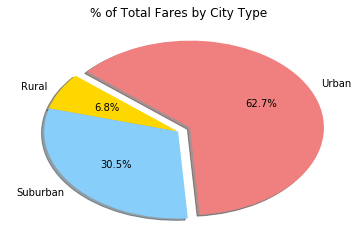

In [116]:
#building piechart 
explode = (0.0, 0.0, 0.1)
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(fares_by_city, autopct="%1.1f%%", labels=labels, shadow=True, startangle=140, explode=explode, colors=colors)
#plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.savefig('& of Total Fares by City Type Pie Chart') 

In [117]:
total_rides = cities_df['Total Rides'].sum()
#total_rides

In [118]:
total_rides_group = cities_df.groupby('City Type')
#total_rides_group.count().head() 

In [119]:
total_rides_by_city = total_rides_group['Total Rides'].sum()/total_rides * 100
#total_rides_by_city

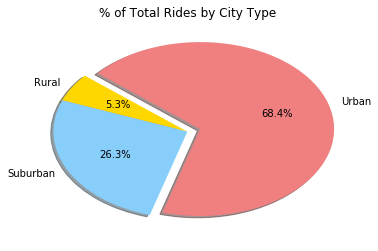

In [120]:
#building piechart 
explode = (0.0, 0.0, 0.1)
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(total_rides_by_city, autopct="%1.1f%%", labels=labels, shadow=True, startangle=140, explode=explode, colors=colors)
#plt.axis('equal')
plt.title('% of Total Rides by City Type')
plt.savefig('& of Total Rides by City Type Pie Chart') 

In [121]:
total_drivers = cities_df['Driver Count'].sum()
#total_drivers

In [122]:
total_drivers_by_city = total_rides_group['Driver Count'].sum()/total_drivers * 100
#total_drivers_by_city

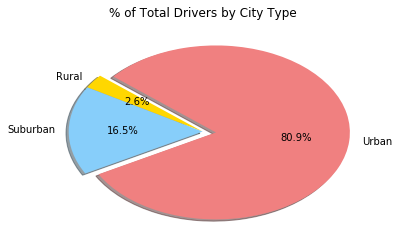

In [123]:
#building piechart 
explode = (0.0, 0.0, 0.1)
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(total_drivers_by_city, autopct="%1.1f%%", labels=labels, shadow=True, startangle=140, explode=explode, colors=colors)
#plt.axis('equal')
plt.title('% of Total Drivers by City Type')
plt.savefig('& of Total Drivers by City Type Pie Chart') 